In [0]:
!pip install sklearn

In [0]:
#!python -m pip install --upgrade pip

In [0]:
!pip install msgpack

In [0]:
!pip install quandl

     |████████████████████████████████| 61kB 15.0MB/s 
     |████████████████████████████████| 61kB 28.7MB/s 
     |████████████████████████████████| 2.3MB 22.3MB/s 
     |████████████████████████████████| 102kB 1.6MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=676d613d9298e478c8b198ecffe4da949f8cce9fdaa1c6adb12d3dee551f9d9e
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
#!pip install pandas

In [0]:
import pandas as pd
import quandl, datetime
import matplotlib.pyplot as plt
from matplotlib import style
import math
import pickle
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
style.use('ggplot')

In [0]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                                ...                                    
2004-08-19  100.01  104.06   95.96  ...  48.128568   50.322842   44659000.0
2004-08-20  101.01  109.08  100.50  ...  50.405597   54.322689   22834300.0
2004-08-23  110.76  113.48  109.05  ...  54.693835   54.869377   18256100.0
2004-08-24  111.24  111.60  103.57  ...  51.945350   52.597363   15247300.0
2004-08-25  104.76  108.00  103.88  ...  52.100830   53.164113    9188600.0

[5 rows x 12 columns]


In [0]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [0]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100.0

In [0]:
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100.0

In [0]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [0]:
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [0]:
forecast_col = 'Adj. Close'

In [0]:
df.fillna(-99999, inplace= True) #replace NAN data

In [0]:
forecast_out = int(math.ceil(0.01 * len(df)))  # 10% of the dataframes
print(forecast_out)

35


In [0]:
df['label'] = df[forecast_col].shift(-forecast_out)


In [0]:
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [0]:
X = np.array(df.drop(['label'], 1)) # df.drop returns a new data frame
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [0]:
df.dropna(inplace = True)

In [0]:
y = np.array(df['label'])


In [0]:
print(len(X), len(y))

3389 3389


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
##Linear Regression
clf = LinearRegression(n_jobs=-1) # -1 means max cpu support
clf.fit(X_train, y_train)
with open('linear_regression.pickle','wb') as fopen:
  pickle.dump(clf,fopen)

pickle_in = open('linear_regression.pickle','rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9768077385982561


In [0]:
###SVM
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
accuracy2 = clf2.score(X_test, y_test)
print(accuracy2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8093419355619996


In [0]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1077.83669836 1092.27685317 1106.32605169 1100.5470751  1093.96929036
 1091.45728976 1089.88452273 1086.76719819 1080.66558831 1076.35642384
 1074.02368887 1094.56415647 1112.88730647 1116.59121616 1131.62410159
 1135.5663376  1133.77771445 1131.61664115 1133.22809322 1152.47494577
 1150.99239511 1160.80463381 1157.29568341 1165.28566863 1186.41539693
 1197.98896825 1191.99826736 1204.0887548  1209.38097269 1207.9624104
 1198.71264386 1203.92725144 1202.87640482 1137.83646263 1085.55737572] 0.9768077385982561 35


In [0]:
df['Forecast'] = np.nan

In [0]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

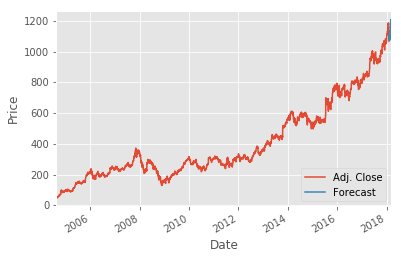

In [0]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix+= one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [0]:
#Regression from scratch

import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [0]:
style.use('fivethirtyeight')

In [0]:
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

In [0]:
#plt.scatter(xs,ys)
#plt.show()

NameError: ignored

In [0]:
def create_dataset(how_much, variance, step=2, correlation=False):
  val = 1
  ys = []
  for i in range(how_much):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation=="pos":
      val+=step
    elif correlation and correlation=="neg":
      val-=step
    xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [0]:
def best_fit_line_and_intercept(xs, ys):
  m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
          (mean(xs)**2 - mean(xs**2)) )
  b = mean(ys) - m*mean(xs)
  return m,b

In [0]:
def squared_error(ys_orig, ys_line):
  return sum((ys_line - ys_orig)**2)

In [0]:
def coefficient_of_determination(ys_orig, ys_line):
  y_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1-(squared_error_regr/squared_error_y_mean)

In [0]:
xs, ys = create_dataset(40, 10, 2, correlation="pos")

In [0]:
m,b = best_fit_line_and_intercept(xs, ys)
print(m, b)

2.0875234521575976 -0.9817073170731518


In [0]:
regression_line = [(m*x)+b for x in xs]

In [0]:
predict_x = 8
predict_y = (m*predict_x) + b

In [0]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.9403584291251922


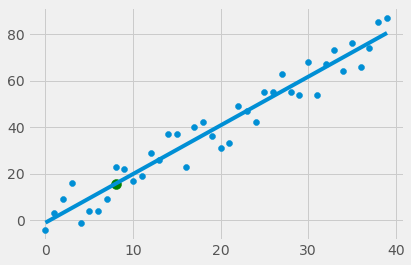

In [0]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.plot(xs, regression_line)
plt.show()

In [0]:
#R^2 or Coefficient of determination gives the accuracy of the model. 
#Squared error is used to calculate the R^2
# Regression line is also called y^ (y-hat line)
# R squared error = 1 - (square_error(y-hat)/ square_error(mean(ys)))